# Feature Detection

## General Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load Images

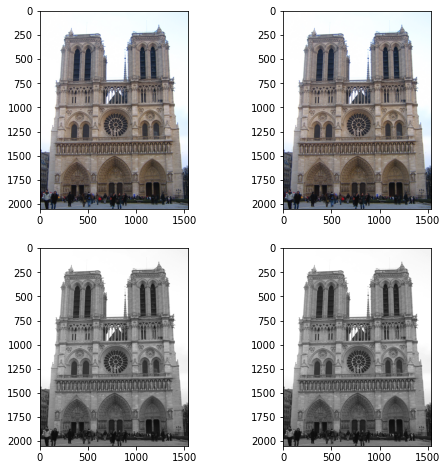

In [2]:
img1 = cv2.imread('data/notredame_1.jpg')
img2 = cv2.imread('data/notredame_2.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img1_bw = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_bw = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(img1_rgb)
plt.subplot(2,2,2)
plt.imshow(img1_rgb)
plt.subplot(2,2,3)
plt.imshow(img1_bw, cmap='gray')
plt.subplot(2,2,4)
plt.imshow(img2_bw, cmap='gray')